**This project applies a series of image enhancement techniques on grayscale images from a specified directory. The enhancements include Morphological Operations like**

**1.Dilation 
2.Erosion 
3. Opening 
4.Closing**


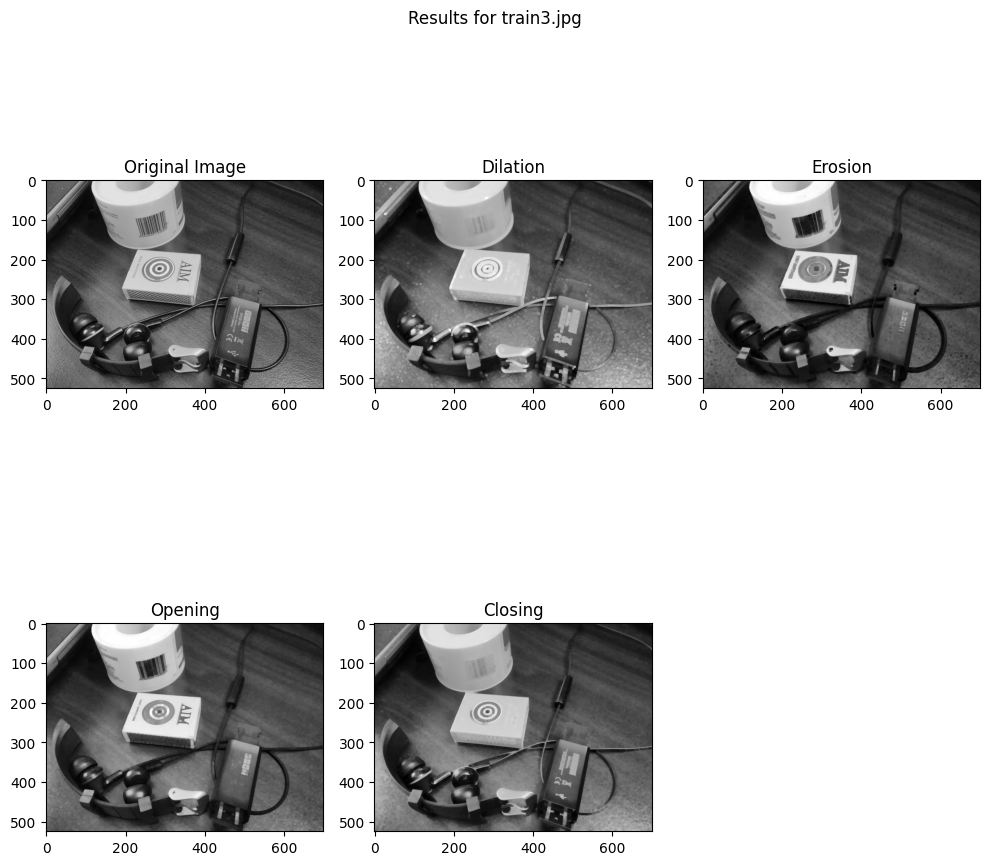

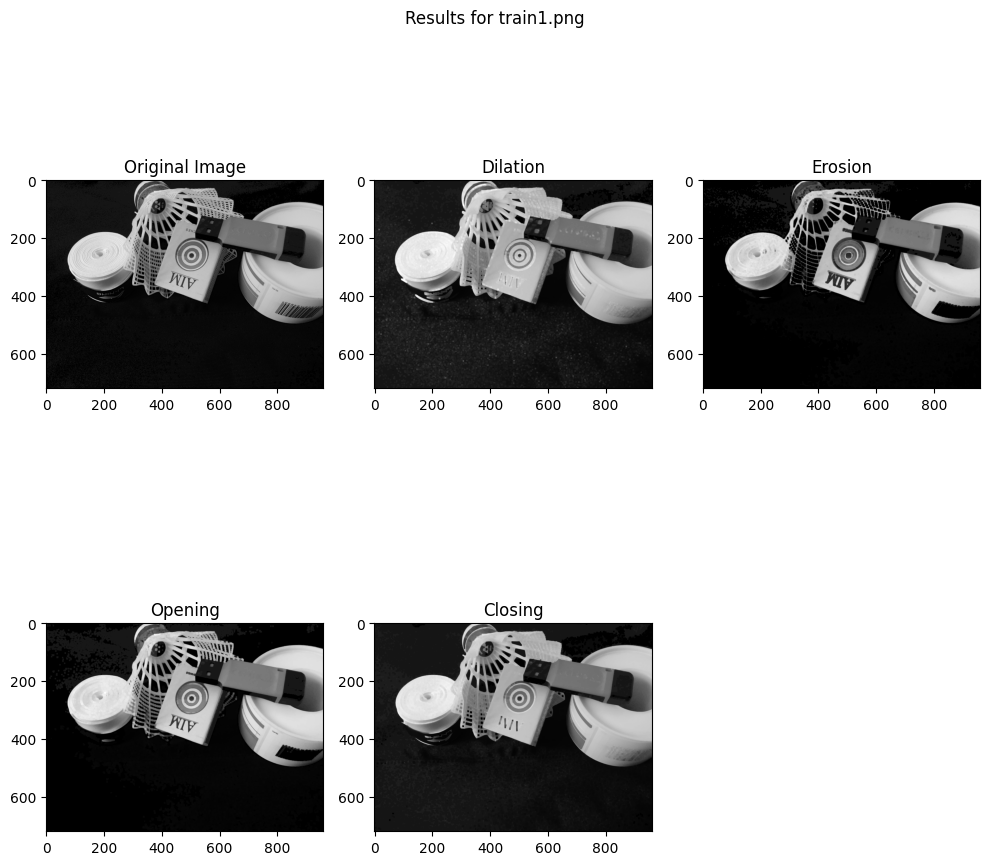

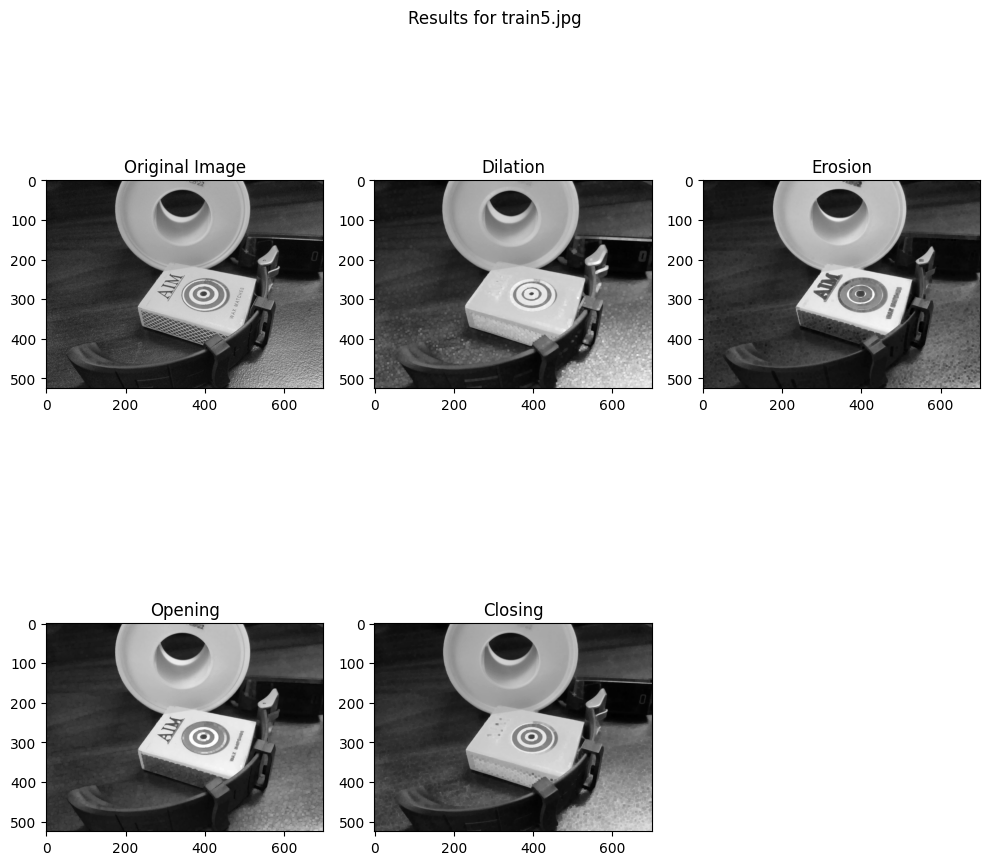

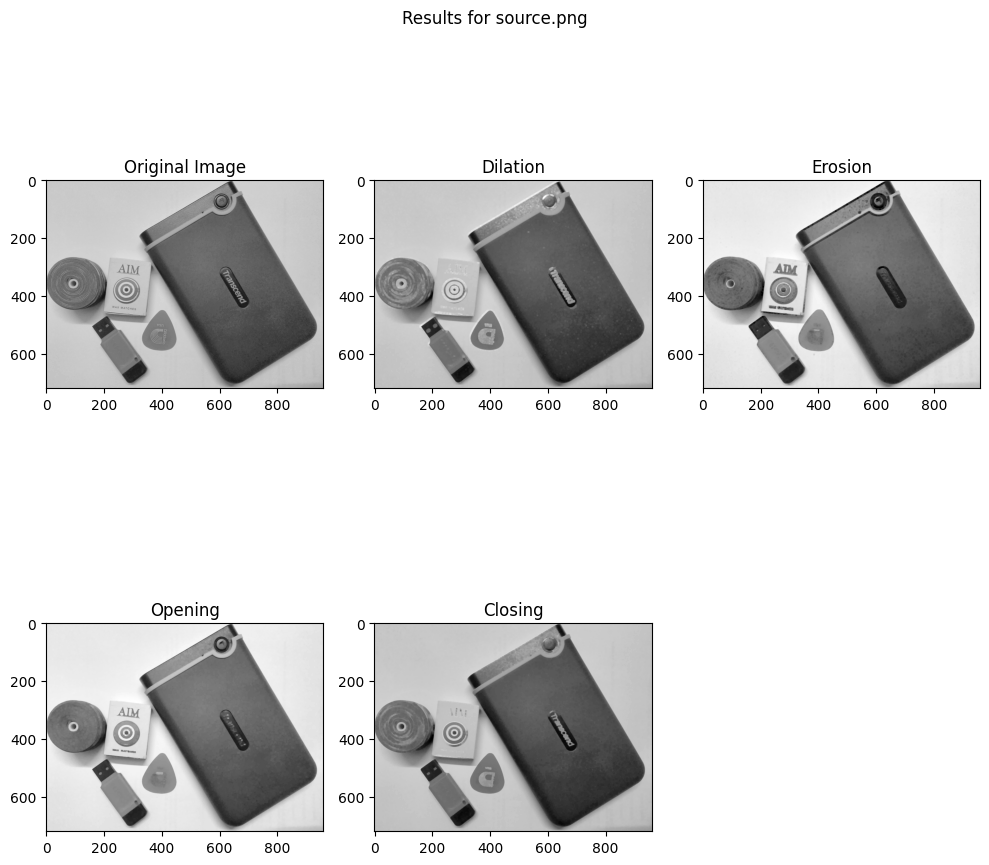

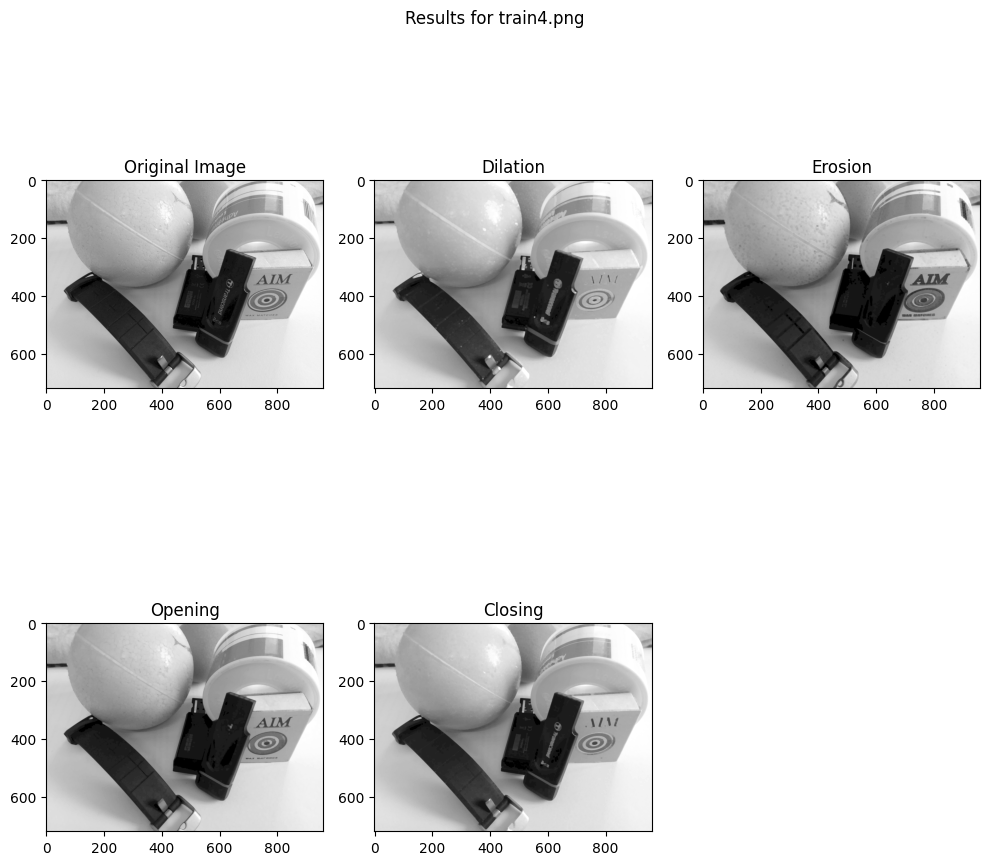

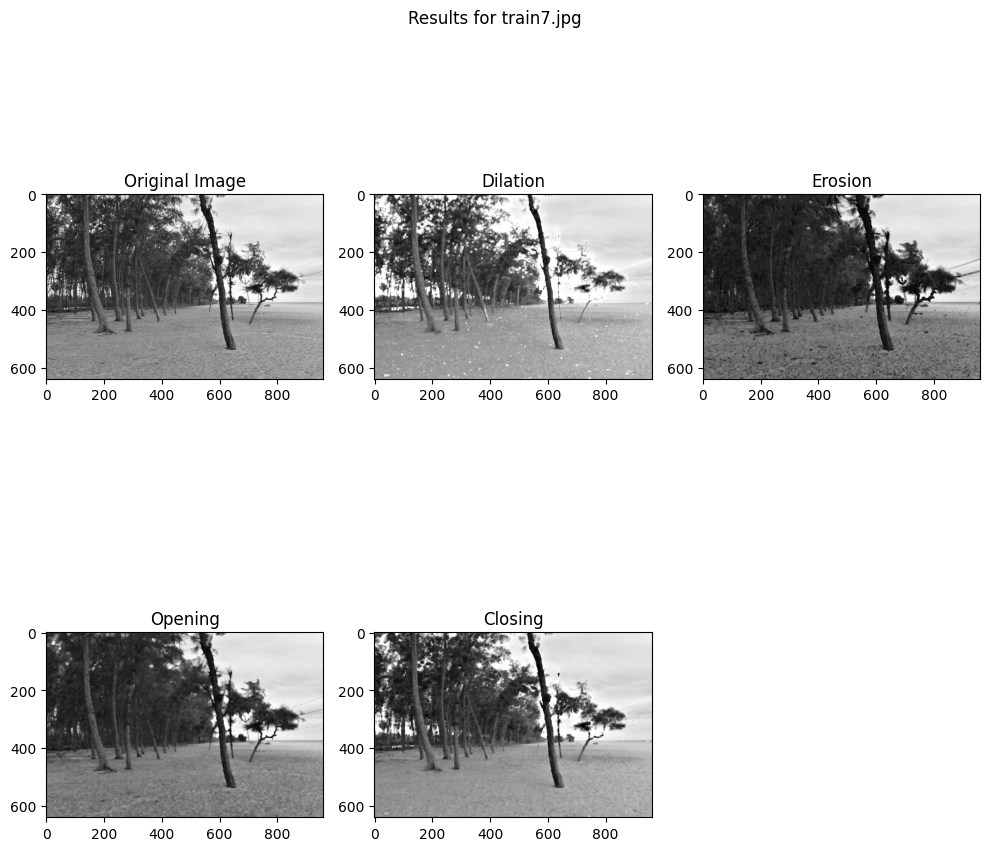

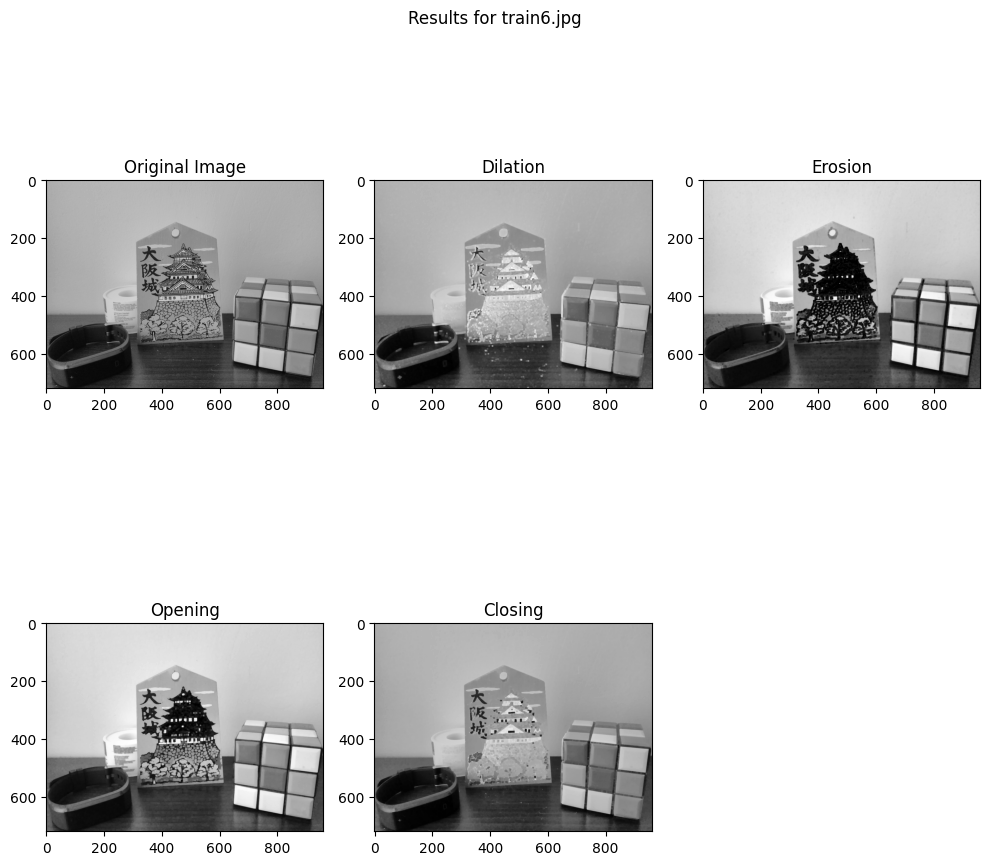

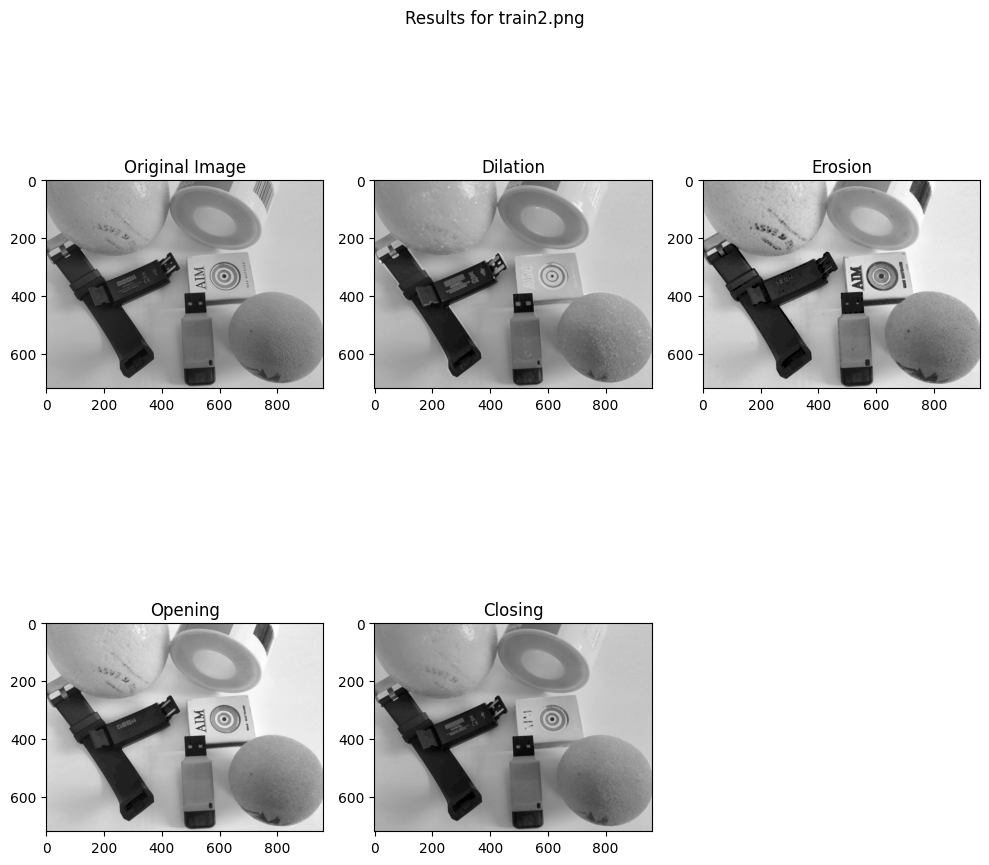

Processed images have been saved in the output folder and displayed.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output folders
image_folder = "/kaggle/input/scenery-dataset/images"         # Folder with input images
output_folder = "/kaggle/working/"                     # Folder to save processed images

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Loop through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for other formats if needed
        img_path = os.path.join(image_folder, filename)
        
        # Load the image in grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Apply morphological operations
        dilated_image = cv2.dilate(image, kernel, iterations=1)
        eroded_image = cv2.erode(image, kernel, iterations=1)
        opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
        closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

        # Save each processed image
        cv2.imwrite(os.path.join(output_folder, f"{filename}_dilated.jpg"), dilated_image)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_eroded.jpg"), eroded_image)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_opened.jpg"), opened_image)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_closed.jpg"), closed_image)

        # Display the original and processed images
        images = [image, dilated_image, eroded_image, opened_image, closed_image]
        titles = ['Original Image', 'Dilation', 'Erosion', 'Opening', 'Closing']
        
        plt.figure(figsize=(10, 10))
        for i in range(5):
            plt.subplot(2, 3, i+1)
            plt.imshow(images[i], cmap='gray')
            plt.title(titles[i])
            plt.axis('on')
        plt.suptitle(f"Results for {filename}")
        plt.tight_layout()
        plt.show()
        plt.close()  # Close the figure to prevent display issues

print("Processed images have been saved in the output folder and displayed.")
